# Boom Bikes Linear Regression Assignment

Problem Statement:
- Figure out the demand varibale which have good dependency on count variable such that it helps in increasing,Utilizing and planning sales stratgies

The steps to be followed in this exercise are as follows:
- Loading, understanding and visualizing the data check for missing and unique values pool
- creating the data for model training (derving feature attributes for X axis,train-test split, rescaling)
- Fit the line for data and Train the model
- Residual analysis and other type of analysis for understanding
- Run model with Test set , Prediction and evaluation of the test set

### Data Viualization

In [1]:
#importing Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
bike = pd.read_csv('day.csv')
bike.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Data Cleaining as we can see date feild has alreday derieved the other columns alreday, 
# Instant is just an index varibale , temp is duplicate and casual and registers as these are simmliar to count
bike.drop(labels = ['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [6]:
# making categorial value map to the pool of values they are meant for
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['mnth'] = bike['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5:'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
bike['weekday'] = bike['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3:  'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow',  4: 'heavy_rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Plots
- Create the Categorial varibale and plot Graphs to understand

In [8]:
continousVar=["season","weathersit","weekday","mnth","cnt"]
continousVar


['season', 'weathersit', 'weekday', 'mnth', 'cnt']

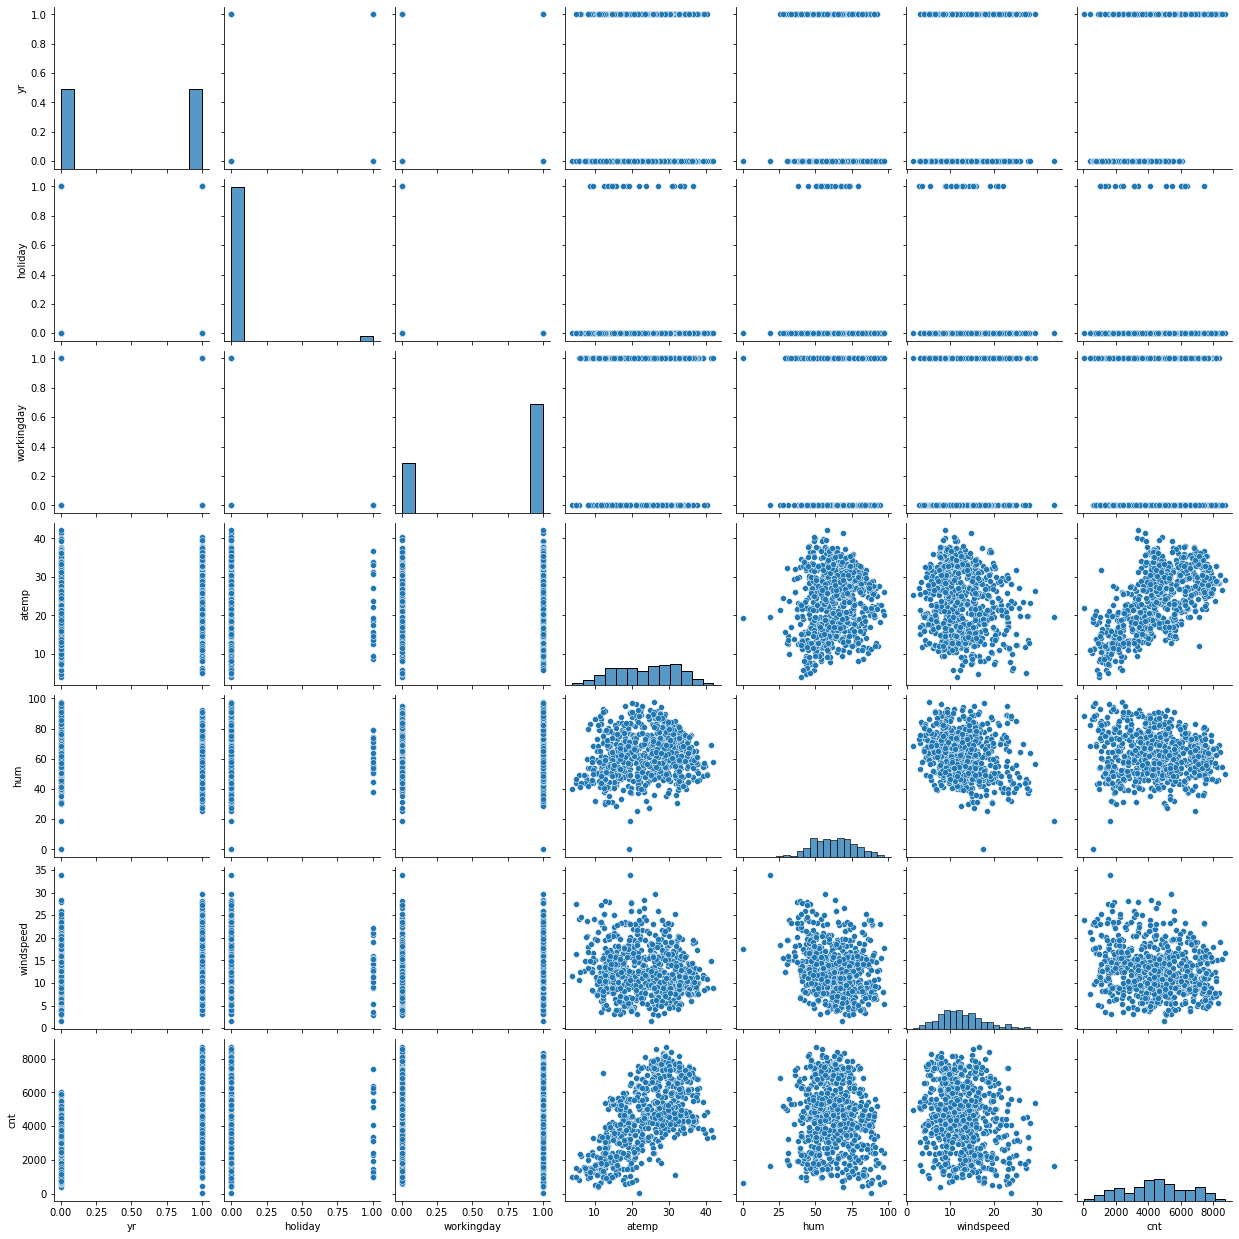

In [9]:
sns.pairplot(bike)
plt.show()

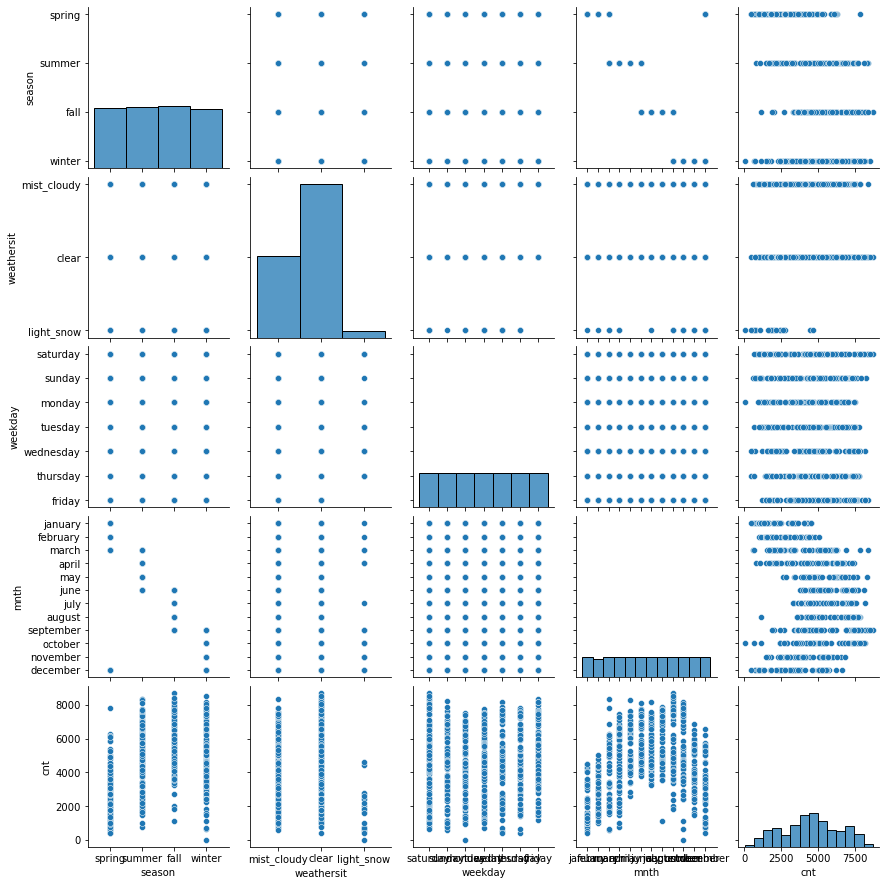

In [10]:
# Pair plot for continous 
sns.pairplot(bike,vars=continousVar)
plt.show()

High corelation found bewtween count variable and temperature, humidity and windspeed, So these can be depndenst fetaure of analysis

#### Let check for Categorial Attributes

In [11]:
categoricalVar = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
categoricalVar

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
for var in categoricalVar:
    print("Attribute: "+var)
    print(bike[var].value_counts())
    print("\n")

Attribute: season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


Attribute: yr
0    365
1    365
Name: yr, dtype: int64


Attribute: mnth
january      62
march        62
may          62
july         62
august       62
october      62
december     62
april        60
june         60
september    60
november     60
february     56
Name: mnth, dtype: int64


Attribute: holiday
0    709
1     21
Name: holiday, dtype: int64


Attribute: weekday
saturday     105
sunday       105
monday       105
tuesday      104
thursday     104
friday       104
wednesday    103
Name: weekday, dtype: int64


Attribute: workingday
1    499
0    231
Name: workingday, dtype: int64


Attribute: weathersit
clear          463
mist_cloudy    246
light_snow      21
Name: weathersit, dtype: int64




Attributes is : Count * season


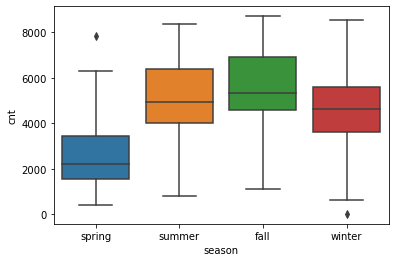

Attributes is : Count * yr


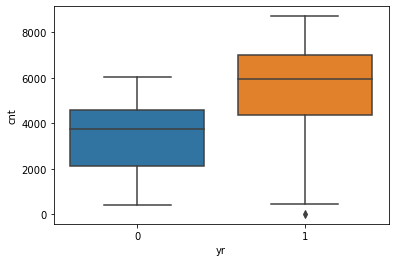

Attributes is : Count * mnth


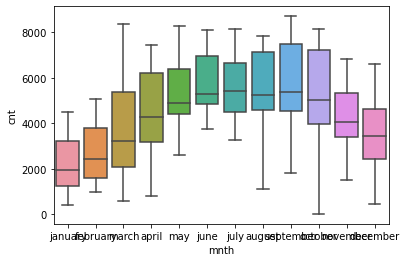

Attributes is : Count * holiday


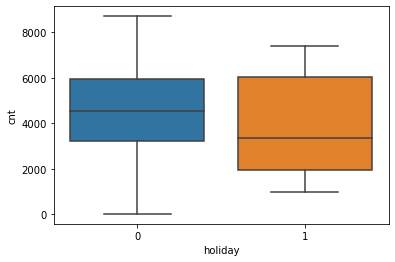

Attributes is : Count * weekday


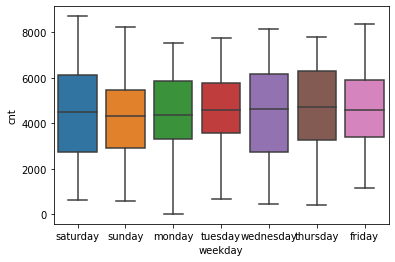

Attributes is : Count * workingday


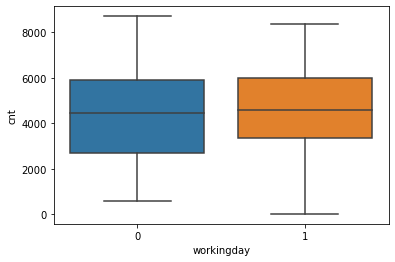

Attributes is : Count * weathersit


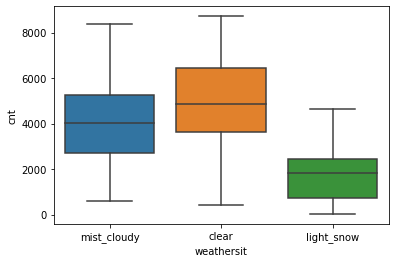

In [13]:
# BoxPlot Analysis for categorical variables
for var in categoricalVar:
    print("Attributes is : Count * "+var)
    sns.boxplot(x=var, y="cnt", data=bike)
    plt.show()

### Conclusion from Box Plot 
- Summer And Fall is the demanding season 
- There is progress in number of usege of bike form year 2018 to 2019
- September and october month is high demanding months
- there is more demands on holiday Mainly for Saturday
- clear Weather leads to more usages and demand of bikes

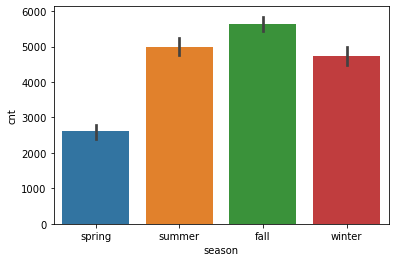

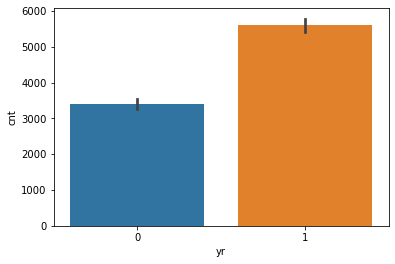

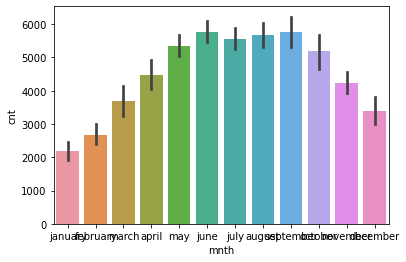

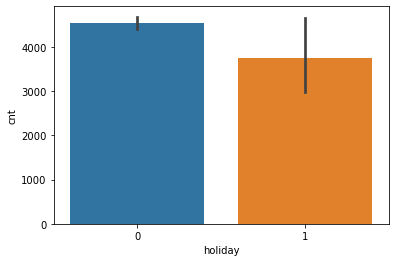

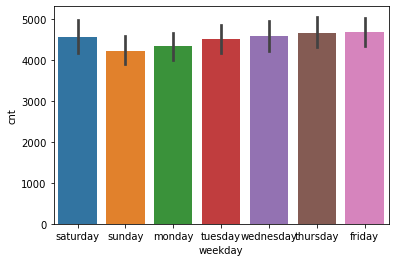

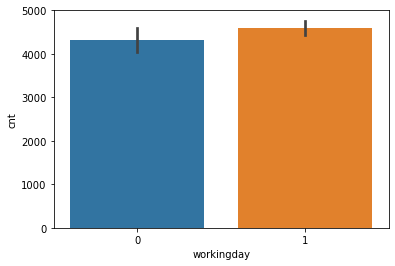

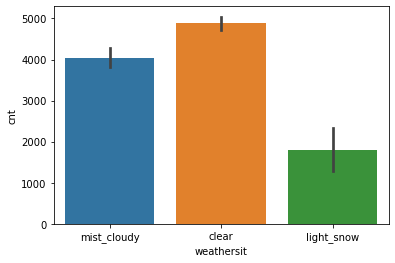

In [14]:
# BarPlot Analysis for categorical variables
for var in categoricalVar:
    sns.barplot(x=var, y="cnt", data=bike)
    plt.show()

### Creating Data For Model Training

#### Creating Dummy Variables

In [15]:
season = pd.get_dummies(bike['season'], drop_first = True)
mnth = pd.get_dummies(bike['mnth'], drop_first = True)
weekday1 = pd.get_dummies(bike['weekday'], drop_first = True)
weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)

In [16]:
# concatinating all the dummy variable columns to get original dataframe
# removing the original categorical columns
bike = pd.concat([bike, season, mnth, weekday1,weathersit], axis = 1)
remcol = ['season', 'mnth', 'weekday', 'weathersit']
bike.drop(bike[remcol], axis = 1, inplace=True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# checking the dataset before developing model
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   atemp        730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  august       730 non-null    uint8  
 11  december     730 non-null    uint8  
 12  february     730 non-null    uint8  
 13  january      730 non-null    uint8  
 14  july         730 non-null    uint8  
 15  june         730 non-null    uint8  
 16  march        730 non-null    uint8  
 17  may          730 non-null    uint8  
 18  november     730 non-null    uint8  
 19  october 

#### Create dataSet for Train and Test

In [18]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100) # lets split the data in 70-30 ratio

#### Make data in common pool range of value with min-max scaling 

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
concol = ['atemp', 'hum', 'windspeed']
bike_train[concol] = scaler.fit_transform(bike_train[concol])
bike_train.head()
print(bike_train.columns)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light_snow', 'mist_cloudy'],
      dtype='object')


In [20]:
bike_train.describe() # check the min and max value

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Craete the varibale for x and y axsis 

In [21]:
y_train = bike_train.pop('cnt') # target vaibaleis count 
X_train = bike_train # all other vaiable expect target

## Fitting data in Linear Model 


In [22]:
print(X_train.columns)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'light_snow',
       'mist_cloudy'],
      dtype='object')


In [23]:
# feature selection using RFE technique (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe =  RFE(lm, n_features_to_select=15) #selecting top15 variables
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # Print features and rankings

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('august', False, 6),
 ('december', True, 1),
 ('february', False, 3),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 7),
 ('march', False, 14),
 ('may', False, 4),
 ('november', True, 1),
 ('october', False, 12),
 ('september', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 13),
 ('light_snow', True, 1),
 ('mist_cloudy', True, 1)]

In [25]:
# keeping only the RFE selected columns and removing others from the predictor dataset

In [26]:
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'december', 'january', 'july', 'november', 'september', 'saturday',
       'light_snow', 'mist_cloudy'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'august', 'february', 'june', 'march', 'may',
       'october', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [28]:
# Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[rfecol]
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,december,january,july,november,september,saturday,light_snow,mist_cloudy
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1


In [29]:
# Adding all the variables to the model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)  # adding constant variable
lr = sm.OLS(y_train, X_train_lm).fit()     # running the model
print(lr.summary())                        # checking summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.67e-187
Time:                        20:11:31   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3204.7688    278.590     11.504      

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test the linear model.

In [30]:
# checking VIF for all variables in the model to study the multicollinearity in the model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,winter,2.93
5,spring,2.89
14,mist_cloudy,2.26
0,yr,2.06
10,november,1.82
8,january,1.75
7,december,1.54


##### Conclusion:
- variables with high p-values (>= 0.05) and high VIFs (>5) to be removed

#### Dropping the variable and updating the model


In [31]:
# building model with all available variables and dropping one-by-one 

In [32]:
# lr_1 without 'saturday'

X = X.drop('saturday', 1)

X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.58e-187
Time:                        20:11:31   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3241.9087    278.114     11.657      

In [34]:
# Dropping the variable and updating the model
# lr_2 without 'saturday' and 'humidity'

X = X.drop('hum', 1)

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.95e-185
Time:                        20:11:31   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2569.6203    223.560     11.494      

In [35]:
# Dropping the variable and updating the model
# lr_3 without 'saturday', 'humidity' and 'november'
X = X.drop('november', 1)

X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.41e-185
Time:                        20:11:31   Log-Likelihood:                -4129.8
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2457.9739    220.836     11.130      

In [36]:
# Dropping the variable and updating the model
# lr_4 without 'saturday', 'humidity', 'november' and 'december'
X = X.drop('december', 1)

X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.75e-185
Time:                        20:11:31   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2356.1727    216.638     10.876      

In [37]:
# Dropping the variable and updating the model
# lr_5 without 'saturday', 'humidity', 'november', 'december' and 'january'

X = X.drop('january', 1)

X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.68e-185
Time:                        20:11:31   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2232.8353    211.209     10.572      

In [38]:
lr_5.params

const          2232.835273
yr             2043.571645
holiday        -826.484887
atemp          4034.912310
windspeed     -1092.018884
spring        -1020.561779
winter          338.691695
july           -590.994742
september       521.978849
light_snow    -2450.461573
mist_cloudy    -710.158488
dtype: float64

## Run Test validation on Test data set to veify Residual


In [39]:
y_train_count = lr_5.predict(X_train_lm) # Residual Analysis

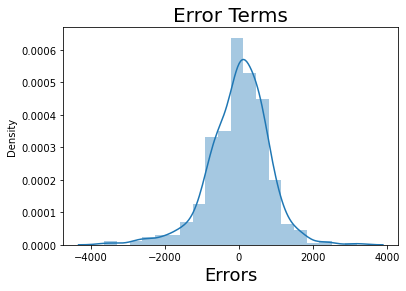

In [40]:
# to check if the error terms are normally distributed (assumptions of linear regression)
# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### Conlusion
- error terms are normally distributed about the mean at 0


### Run Predection on Model built


In [41]:
# Applying the scaling on the test sets
# scaling the test data using transform()

concol = ['atemp', 'hum','windspeed']
bike_test[concol] = scaler.transform(bike_test[concol])
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
bike_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [44]:
# adding constant the predictor set
# creating X_test_lm dataframe by dropping the variables
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm.drop(['january', 'december','november', "hum", "saturday", 'workingday', 'summer', 'august', 'february', 'june', 'march', 'may',
       'october', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'], axis = 1)

In [45]:
X_test_lm.head()

,const,yr,holiday,atemp,windspeed,spring,winter,july,september,light_snow,mist_cloudy
184,1.0,0,1,0.769660,0.084219,0,0,1,0,0,1
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0


In [46]:
# making predictions using the lr_5 model
y_pred_lm = lr_5.predict(X_test_lm)

### Summarizing the Model

plotting the graph for actual versus predicted values

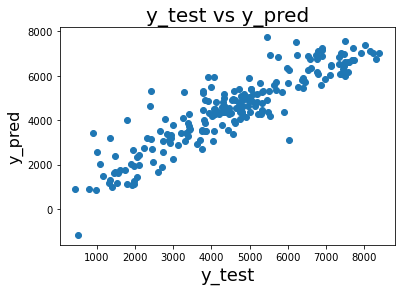

In [47]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)          # X-label
plt.ylabel('y_pred', fontsize = 16)          # Y-label
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
# Looking at the RMSE
# returns the mean squared error, taking a square root
np.sqrt(mean_squared_error(y_test, y_pred_lm))

827.8900235864853

#### Run the R-squared Calculation on Test data

In [50]:
# checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred_lm)
r_squared

0.8089924291633281

### Model Accuracy :
- R_Squ of 0.83 on training dataset
- R_Squ ared of 0.81 on test dataset

with 10 predictor variables